In [71]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

session = Session()
session.headers.update(headers)

try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

In [72]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [73]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/Users/grace/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10261,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000,19417681,19417681,False,NaN,1,NaN,NaN,None,2023-07-02T11:16:00.000Z,30521,8161777377,-64,-0,0,-0,13,7,8,592645808163,50,640939665835,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
1,1027,Ethereum,ETH,ethereum,7047,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120218755,120218755,True,NaN,2,NaN,NaN,None,2023-07-02T11:16:00.000Z,1919,4202964876,-65,0,-0,0,1,3,6,230642375563,19,230642375563,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
2,825,Tether,USDT,tether,56072,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83341708027,85733529362,True,NaN,3,NaN,NaN,None,2023-07-02T11:16:00.000Z,1,17223830758,-56,0,0,-0,-0,-0,0,83349520135,7,85741565670,None,2023-07-02T11:16:00.000Z,1027,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-02 11:18:55.486802
3,1839,BNB,BNB,bnb,1473,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155851053,155851053,False,NaN,4,NaN,NaN,None,2023-07-02T11:16:00.000Z,245,552162952,-14,-0,1,2,-20,-24,-21,38257002363,3,38257002363,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
4,3408,USD Coin,USDC,usd-coin,13163,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27395821442,27395821442,False,NaN,5,NaN,NaN,None,2023-07-02T11:16:00.000Z,1,1897688773,-67,0,0,0,0,0,0,27400307716,2,27400307716,None,2023-07-02T11:16:00.000Z,1027,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-02 11:18:55.486802
5,52,XRP,XRP,xrp,970,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000,52254289650,99988655562,False,NaN,6,NaN,NaN,None,2023-07-02T11:16:00.000Z,0,954229796,-22,-0,2,-3,-7,5,-7,25068828301,2,47974680105,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
6,2010,Cardano,ADA,cardano,846,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000,34947742033,35936967442,False,NaN,7,NaN,NaN,None,2023-07-02T11:16:00.000Z,0,201870598,-51,0,1,-3,-23,-25,-27,10101452826,1,13007002763,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140005796384,140005796384,True,NaN,8,NaN,NaN,None,2023-07-02T11:16:00.000Z,0,322958719,-58,-0,-0,-0,-7,-14,-14,9410556595,1,9410556595,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
8,2,Litecoin,LTC,litecoin,930,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000,73272739,84000000,False,NaN,9,NaN,NaN,None,2023-07-02T11:16:00.000Z,110,1642987019,-49,-0,4,24,16,25,19,8067046826,1,9248076987,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
9,5426,Solana,SOL,solana,476,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,400764316,551366681,True,NaN,10,NaN,NaN,None,2023-07-02T11:16:00.000Z,19,376607904,-57,-1,5,12,-10,-12,-6,7665182664,1,10545665260,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802


In [74]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'/Users/grace/인프런 Data Engineering, 알고리즘/Alex the Analyst/API.csv'):
        df.to_csv(r'/Users/grace/인프런 Data Engineering, 알고리즘/Alex the Analyst/API.csv', header ='column_names')
    else: 
        df.to_csv(r'/Users/grace/인프런 Data Engineering, 알고리즘/Alex the Analyst/API.csv', mode = 'a', header = False) #False  = it is not going to use the header everytime for every 15 rows 
        
        

In [2]:
type(data)

dict

In [5]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-07-01T07:02:26.330Z,0,None,84,25,None,10317


In [6]:
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10261,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.941662e+07,19416618,...,5.911351e+11,49.5867,6.393408e+11,NaN,2023-07-01T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7044,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202191e+08,120219087.921407,...,2.308733e+11,19.3674,2.308733e+11,NaN,2023-07-01T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,56049,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.334171e+10,85733529362.298569,...,8.332262e+10,6.9894,8.571389e+10,NaN,2023-07-01T06:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1473,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558512e+08,155851234.226344,...,3.764704e+10,3.1585,3.764704e+10,NaN,2023-07-01T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,13156,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.739394e+10,27393937353.303883,...,2.739644e+10,2.2982,2.739644e+10,NaN,2023-07-01T06:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,23678,Liquid Staking Derivatives,LSD,liquid-staking-derivatives,3,2023-02-27T11:07:03.000Z,[],4.200000e+06,0.000000e+00,4200000,...,0.000000e+00,0.0000,3.132278e+05,NaN,2023-07-01T06:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0x97d4f49eeb0e2c96d5ebaa71ab8418e563ecd9fd
4996,17859,Teddy Doge,Teddy V2,teddydoge,29,2022-02-04T08:24:34.000Z,[],1.285200e+15,0.000000e+00,870815198025744,...,0.000000e+00,0.0000,5.332385e+05,NaN,2023-07-01T06:59:00.000Z,1839.0,BNB,BNB,bnb,0xDB79c12d1d0670988A39B0E48b96e955eF922d24
4997,8899,xSUSHI,XSUSHI,xsushi,19,2021-03-21T00:00:00.000Z,"[decentralized-exchange-dex-token, defi, dex, ...",6.106282e+07,0.000000e+00,0,...,0.000000e+00,0.0000,5.591761e+07,NaN,2023-07-01T06:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0x8798249c2E607446EfB7Ad49eC89dD1865Ff4272
4998,11736,CryptoMines,ETERNAL,cryptomines,56,2021-09-07T15:44:31.000Z,"[play-to-earn, mvb]",5.000000e+06,0.000000e+00,5000000,...,0.000000e+00,0.0000,5.658594e+05,NaN,2023-07-01T06:59:00.000Z,1839.0,BNB,BNB,bnb,0xD44FD09d74cd13838F137B590497595d6b3FEeA4


# Automate and add the data

In [75]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()


/Users/grace/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


KeyboardInterrupt: 

In [25]:
df4 = pd.read_csv(r'/Users/grace/인프런 Data Engineering, 알고리즘/Alex the Analyst/API.csv')
df4

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10261,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.941768e+07,1.941768e+07,False,NaN,1,NaN,NaN,NaN,2023-07-02T10:36:00.000Z,30521.452358,8.222310e+09,-63.4768,-0.044712,0.138150,-0.453536,12.694020,6.577195,7.462916,5.926558e+11,49.5421,6.409505e+11,NaN,2023-07-02T10:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 10:38:54.811600,NaN
1,1,1027,Ethereum,ETH,ethereum,7047,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202188e+08,1.202188e+08,True,NaN,2,NaN,NaN,NaN,2023-07-02T10:36:00.000Z,1916.717109,4.268871e+09,-64.5310,-0.038144,-0.322006,-0.187166,1.375973,2.684514,5.856458,2.304253e+11,19.2688,2.304253e+11,NaN,2023-07-02T10:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 10:38:54.811600,NaN
2,2,825,Tether,USDT,tether,56072,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.334171e+10,8.573353e+10,True,NaN,3,NaN,NaN,NaN,2023-07-02T10:36:00.000Z,1.000119,1.746511e+10,-55.8365,0.007778,0.027970,-0.027660,-0.022261,-0.020817,0.008472,8.335164e+10,6.9695,8.574375e+10,NaN,2023-07-02T10:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-02 10:38:54.811600,NaN
3,3,1839,BNB,BNB,bnb,1473,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558511e+08,1.558511e+08,False,NaN,4,NaN,NaN,NaN,2023-07-02T10:36:00.000Z,245.460846,5.581551e+08,-12.8439,-0.030792,0.924180,2.427717,-20.128131,-24.144870,-21.555696,3.825533e+10,3.1985,3.825533e+10,NaN,2023-07-02T10:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 10:38:54.811600,NaN
4,4,3408,USD Coin,USDC,usd-coin,13163,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.739582e+10,2.739582e+10,False,NaN,5,NaN,NaN,NaN,2023-07-02T10:36:00.000Z,1.000159,1.949403e+09,-66.6318,0.005904,0.005572,0.011089,0.030173,0.012522,0.036934,2.740019e+10,2.2909,2.740019e+10,NaN,2023-07-02T10:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-02 10:38:54.811600,NaN
5,5,52,XRP,XRP,xrp,970,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,NaN,2023-07-02T10:36:00.000Z,0.479619,9.574662e+08,-22.5741,-0.393401,2.011143,-2.792521,-6.748079,4.959849,-6.917534,2.506214e+10,2.0952,4.796187e+10,NaN,2023-07-02T10:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 10:38:54.811600,NaN
6,6,2010,Cardano,ADA,cardano,846,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.494774e+10,3.593697e+10,False,NaN,7,NaN,NaN,NaN,2023-07-02T10:36:00.000Z,0.289040,2.035133e+08,-53.4170,0.070699,0.349201,-3.320328,-22.689622,-24.986015,-27.700514,1.010130e+10,0.8447,1.300680e+10,NaN,2023-07-02T10:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 10:38:54.811600,NaN
7,7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.400058e+11,1.400058e+11,True,NaN,8,NaN,NaN,NaN,2023-07-02T10:36:00.000Z,0.067339,3.382995e+08,-56.1132,-0.024070,-1.121971,-0.331063,-6.592826,-13.867062,-14.551771,9.427890e+09,0.7882,9.427890e+09,NaN,2023-07-02T10:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 10:38:54.811600,NaN
8,8,2,Litecoin,LTC,litecoin,930,2013-04-28T00:00:00.000Z

In [76]:
pd.set_option('display.float_format', lambda x: '%5.f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10261,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000,19417681,19417681,False,NaN,1,NaN,NaN,None,2023-07-02T11:16:00.000Z,30521,8161777377,-64,-0,0,-0,13,7,8,592645808163,50,640939665835,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
1,1027,Ethereum,ETH,ethereum,7047,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120218755,120218755,True,NaN,2,NaN,NaN,None,2023-07-02T11:16:00.000Z,1919,4202964876,-65,0,-0,0,1,3,6,230642375563,19,230642375563,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
2,825,Tether,USDT,tether,56072,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83341708027,85733529362,True,NaN,3,NaN,NaN,None,2023-07-02T11:16:00.000Z,1,17223830758,-56,0,0,-0,-0,-0,0,83349520135,7,85741565670,None,2023-07-02T11:16:00.000Z,1027,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-02 11:18:55.486802
3,1839,BNB,BNB,bnb,1473,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155851053,155851053,False,NaN,4,NaN,NaN,None,2023-07-02T11:16:00.000Z,245,552162952,-14,-0,1,2,-20,-24,-21,38257002363,3,38257002363,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
4,3408,USD Coin,USDC,usd-coin,13163,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27395821442,27395821442,False,NaN,5,NaN,NaN,None,2023-07-02T11:16:00.000Z,1,1897688773,-67,0,0,0,0,0,0,27400307716,2,27400307716,None,2023-07-02T11:16:00.000Z,1027,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-02 11:18:55.486802
5,52,XRP,XRP,xrp,970,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000,52254289650,99988655562,False,NaN,6,NaN,NaN,None,2023-07-02T11:16:00.000Z,0,954229796,-22,-0,2,-3,-7,5,-7,25068828301,2,47974680105,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
6,2010,Cardano,ADA,cardano,846,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000,34947742033,35936967442,False,NaN,7,NaN,NaN,None,2023-07-02T11:16:00.000Z,0,201870598,-51,0,1,-3,-23,-25,-27,10101452826,1,13007002763,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140005796384,140005796384,True,NaN,8,NaN,NaN,None,2023-07-02T11:16:00.000Z,0,322958719,-58,-0,-0,-0,-7,-14,-14,9410556595,1,9410556595,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
8,2,Litecoin,LTC,litecoin,930,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000,73272739,84000000,False,NaN,9,NaN,NaN,None,2023-07-02T11:16:00.000Z,110,1642987019,-49,-0,4,24,16,25,19,8067046826,1,9248076987,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802
9,5426,Solana,SOL,solana,476,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,400764316,551366681,True,NaN,10,NaN,NaN,None,2023-07-02T11:16:00.000Z,19,376607904,-57,-1,5,12,-10,-12,-6,7665182664,1,10545665260,None,2023-07-02T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 11:18:55.486802


In [77]:
#df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0,0,-0,13,7,8
Ethereum,0,-0,0,1,3,6
Tether,0,0,-0,-0,-0,0
BNB,-0,1,2,-20,-24,-21
USD Coin,0,0,0,0,0,0
XRP,-0,2,-3,-7,5,-7
Cardano,0,1,-3,-23,-25,-27
Dogecoin,-0,-0,-0,-7,-14,-14
Litecoin,-0,4,24,16,25,19


In [78]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h       -0
                 quote.USD.percent_change_24h       0
                 quote.USD.percent_change_7d       -0
                 quote.USD.percent_change_30d      13
                 quote.USD.percent_change_60d       7
                 quote.USD.percent_change_90d       8
Ethereum         quote.USD.percent_change_1h        0
                 quote.USD.percent_change_24h      -0
                 quote.USD.percent_change_7d        0
                 quote.USD.percent_change_30d       1
                 quote.USD.percent_change_60d       3
                 quote.USD.percent_change_90d       6
Tether           quote.USD.percent_change_1h        0
                 quote.USD.percent_change_24h       0
                 quote.USD.percent_change_7d       -0
                 quote.USD.percent_change_30d      -0
                 quote.USD.percent_change_60d      -0
                 quote.USD.percent_c

In [79]:
df5 = df4.to_frame(name='values')
df5

values
name                                                
Bitcoin         quote.USD.percent_change_1h       -0
                quote.USD.percent_change_24h       0
                quote.USD.percent_change_7d       -0
                quote.USD.percent_change_30d      13
                quote.USD.percent_change_60d       7
                quote.USD.percent_change_90d       8
Ethereum        quote.USD.percent_change_1h        0
                quote.USD.percent_change_24h      -0
                quote.USD.percent_change_7d        0
                quote.USD.percent_change_30d       1
                quote.USD.percent_change_60d       3
                quote.USD.percent_change_90d       6
Tether          quote.USD.percent_change_1h        0
                quote.USD.percent_change_24h       0
                quote.USD.percent_change_7d       -0
                quote.USD.percent_change_30d      -0
                quote.USD.percent_change_60d      -0
                quote.USD.percent_change_90d       0
BNB             quote.USD.percent_change_1h       -0
                quote.USD.percent_change_24h       1
                quote.USD.percent_change_7d        2
                quote.USD.percent_change_30d     -20
                quote.USD.percent_change_60d     -24
                quote.USD.percent_change_90d     -21
USD Coin        quote.USD.percent_change_1h        0
                quote.USD.percent_change_24h       0
                quote.USD.percent_change_7d        0
                quote.USD.percent_change_30d       0
                quote.USD.percent_change_60d       0
                quote.USD.percent_change_90d       0
XRP             quote.USD.percent_change_1h       -0
                quote.USD.percent_change_24h       2
                quote.USD.percent_change_7d       -3
                quote.USD.percent_change_30d      -7
                quote.USD.percent_change_60d       5
                quote.USD.percent_change_90d      -7
Cardano         quote.USD.percent_change_1h        0
                quote.USD.percent_change_24h       1
                quote.USD.percent_change_7d       -3
                quote.USD.percent_change_30d     -23
                quote.USD.percent_change_60d     -25
                quote.USD.percent_change_90d     -27
Dogecoin        quote.USD.percent_change_1h       -0
                quote.USD.percent_change_24h      -0
                quote.USD.percent_change_7d       -0
                quote.USD.percent_change_30d      -7
                quote.USD.percent_change_60d     -14
                quote.USD.percent_change_90d     -14
Litecoin        quote.USD.percent_change_1h       -0
                quote.USD.percent_change_24h       4
                quote.USD.percent_change_7d       24
                quote.USD.percent_change_30d      16
                quote.USD.percent_change_60d      25
                quote.USD.percent_change_90d      19
Solana          quote.USD.percent_change_1h       -1
                quote.USD.percent_change_24h       5
                quote.USD.percent_change_7d       12
                quote.USD.percent_change_30d     -10
                quote.USD.percent_change_60d     -12
                quote.USD.percent_change_90d      -6
TRON            quote.USD.percent_change_1h        0
                quote.USD.percent_change_24h      -2
                quote.USD.percent_change_7d        3
                quote.USD.percent_change_30d      -1
                quote.USD.percent_change_60d       9
                quote.USD.percent_change_90d      16
Polkadot        quote.USD.percent_change_1h        0
                quote.USD.percent_change_24h      -1
                quote.USD.percent_change_7d        2
                quote.USD.percent_change_30d      -0
                quote.USD.percent_change_60d      -7
                quote.USD.percent_change_90d     -17
Polygon         quote.USD.percent_change_1h       -0
                quote.USD.percent_change_24h       1
                qu

In [80]:
df5.count()

values    90
dtype: int64

In [81]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0
1,Bitcoin,quote.USD.percent_change_24h,0
2,Bitcoin,quote.USD.percent_change_7d,-0
3,Bitcoin,quote.USD.percent_change_30d,13
4,Bitcoin,quote.USD.percent_change_60d,7
5,Bitcoin,quote.USD.percent_change_90d,8
6,Ethereum,quote.USD.percent_change_1h,0
7,Ethereum,quote.USD.percent_change_24h,-0
8,Ethereum,quote.USD.percent_change_7d,0
9,Ethereum,quote.USD.percent_change_30d,1


In [82]:
df7 = df6.rename(columns ={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0
1,Bitcoin,quote.USD.percent_change_24h,0
2,Bitcoin,quote.USD.percent_change_7d,-0
3,Bitcoin,quote.USD.percent_change_30d,13
4,Bitcoin,quote.USD.percent_change_60d,7
5,Bitcoin,quote.USD.percent_change_90d,8
6,Ethereum,quote.USD.percent_change_1h,0
7,Ethereum,quote.USD.percent_change_24h,-0
8,Ethereum,quote.USD.percent_change_7d,0
9,Ethereum,quote.USD.percent_change_30d,1


In [90]:
# change the percent change values into 간결하게
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])

df7

,name,percent_change,values
0,Bitcoin,1h,-0
1,Bitcoin,24h,0
2,Bitcoin,7d,-0
3,Bitcoin,30d,13
4,Bitcoin,60d,7
5,Bitcoin,90d,8
6,Ethereum,1h,0
7,Ethereum,24h,-0
8,Ethereum,7d,0
9,Ethereum,30d,1


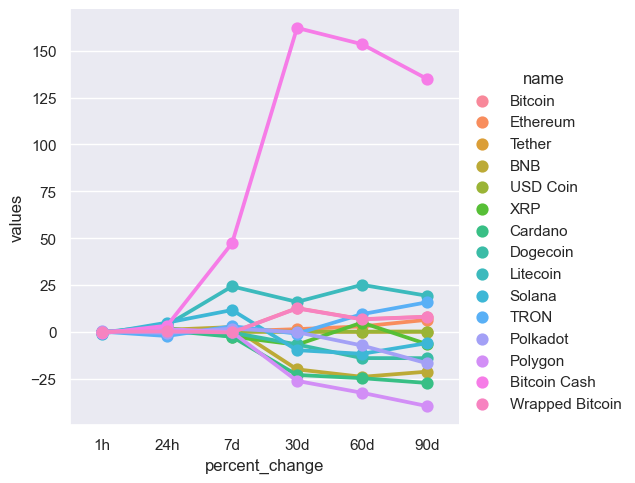

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='percent_change', y = 'values', hue = 'name', data  = df7, kind = 'point' ) # hue: legend
plt.show()


In [95]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,30521,2023-07-02 11:18:55.486802


In [98]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>